In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from thalamus_merfish_analysis import ccf_plots as cplots
from thalamus_merfish_analysis import ccf_images as cimg
from thalamus_merfish_analysis import abc_load as abc
get_ipython().run_line_magic('matplotlib', 'inline') 

## Load ABC Atlas metadata

In [3]:
# Load just obs metadata (only used in cplots.plot_ccf_overlay())
realigned=False
obs = abc.get_combined_metadata(realigned=realigned, version="20230830", drop_unused=False)

# Filter out non-neuronal and some other outlier non-thalamus types
obs_neurons = abc.filter_adata_by_class(obs, filter_midbrain=False)

In [4]:
# set some column-access variables
if realigned:
    ccf_label = 'parcellation_substructure_realigned'
    coords = 'section'
else:
    ccf_label = 'parcellation_substructure'
    coords = 'reconstructed'

## Load CCF images & generate CCF boundaries 

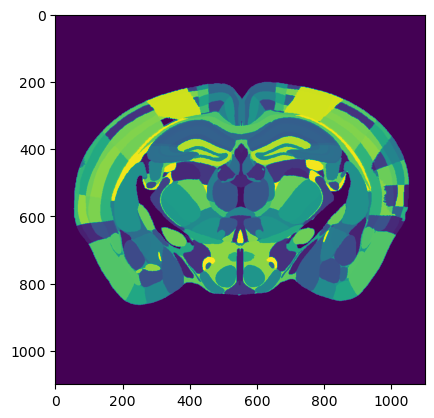

In [5]:
# abc.get_ccf_labels_image() loads all ccf structures!
ccf_labels_img = abc.get_ccf_labels_image(resampled=True, realigned=realigned)
plt.imshow(ccf_labels_img[:,:,35].T)

In [6]:
def get_ccf_names(level='substructure'):
    ccf_df = abc.get_ccf_metadata()
    ccf_ind = np.hstack(ccf_df['parcellation_index'].unique())
    ccf_labels = ccf_df.pivot(index='parcellation_index', values='parcellation_term_acronym', 
                              columns='parcellation_term_set_name')
    ccf_names = ccf_labels.loc[ccf_ind, level].values
    
    return ccf_names

In [7]:
# set CCF level, e.g. 'structure' or 'substructure'
ccf_level = 'substructure'
ccf_substructure_names = sorted(get_ccf_names(level='substructure'))

### Generate random per-structure metric for testing

This HAS to be in the form of a DataFrame in order to be compatible with the way the plot_metrics function is written - so sorry for that 

In [8]:
test_metric = np.random.rand(len(ccf_substructure_names))

# Add to dataframe
test_metric_df = pd.DataFrame({'test_metric':test_metric}, 
                              index=ccf_substructure_names) # index needs to be the ccf_names
test_metric_df

,test_metric
AAA,0.010249
ACAd1,0.633191
ACAd2/3,0.361776
ACAd5,0.239785
ACAd6a,0.441914
...,...
vhc,0.488747
von,0.309360
vtd,0.515915
x,0.444296


## Show plotting for full coronal section

In [9]:
section_col = 'z_'+coords
# sections_GRC = [6.4, 7.2, 8.0]
sections_test = [6.4]

### w/ plot_ccf_overlay()

In [ ]:
# we need to load a dummy
# Load just obs metadata (only used in cplots.plot_ccf_overlay())
realigned=False
obs = abc.get_combined_metadata(realigned=T, version="20230830", drop_unused=False)

# Filter out non-neuronal and some other outlier non-thalamus types
obs_neurons = abc.filter_adata_by_class(obs, filter_midbrain=False)

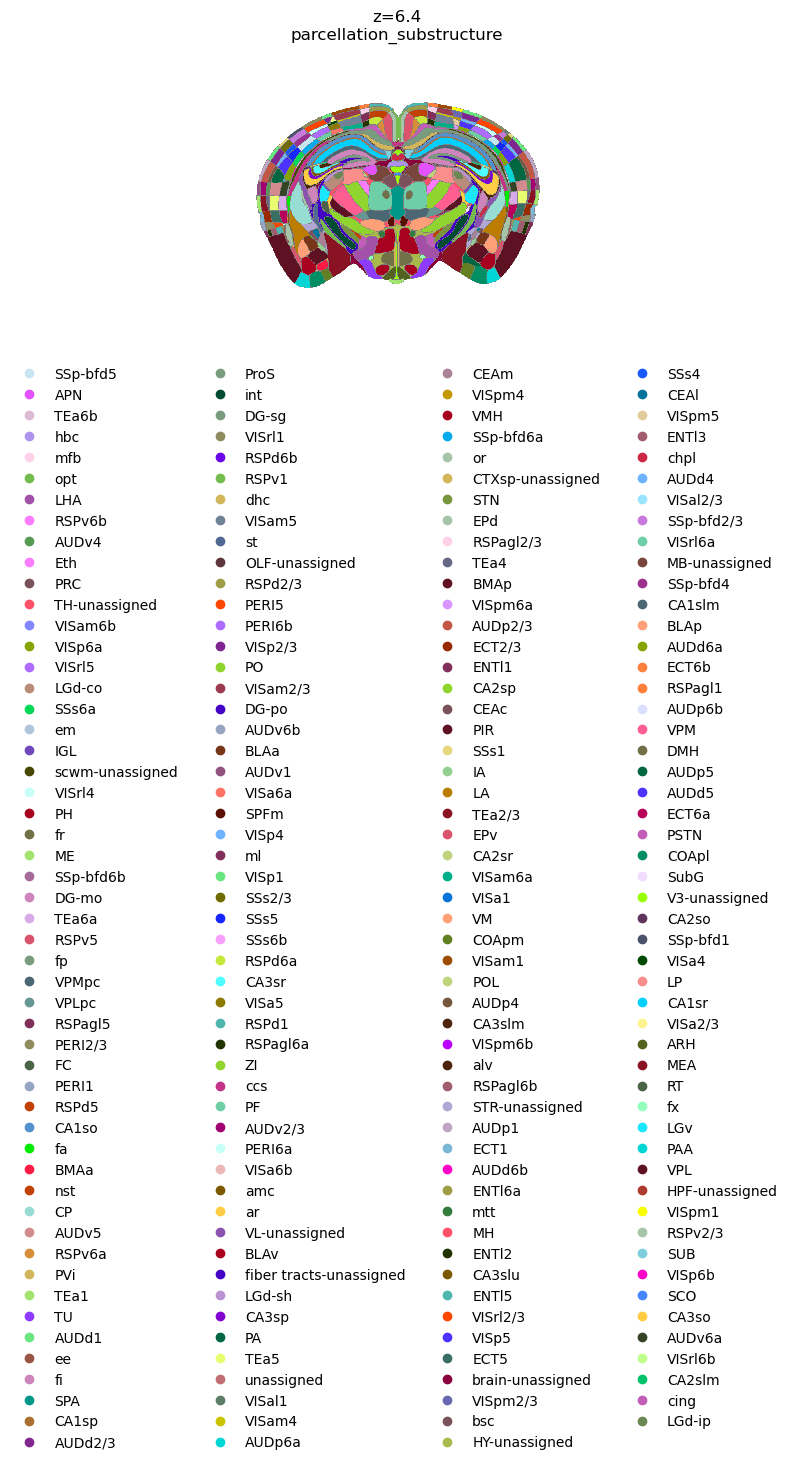

In [10]:
ara_figs = cplots.plot_ccf_overlay(obs_neurons.iloc[[],:], # no foreground cells; just the ccf shapes
                                   ccf_labels_img, 
                                   sections=sections_test,
                                   ccf_names=ccf_substructure_names, # ccf parcellations to plot
                                   point_hue=ccf_label, highlight='all', 
                                   legend='ccf', shape_palette=None,
                                   custom_xy_lims=[0,11,11,0], # y-axis is flipped, so need to do min,max 
                                                               # to display right-side-up
                                   section_col=section_col,
                                   x_col = 'x_'+coords, y_col = 'y_'+coords, 
                                   min_section_count=0);

### w/ plot_metrics_ccf_full_coronal()

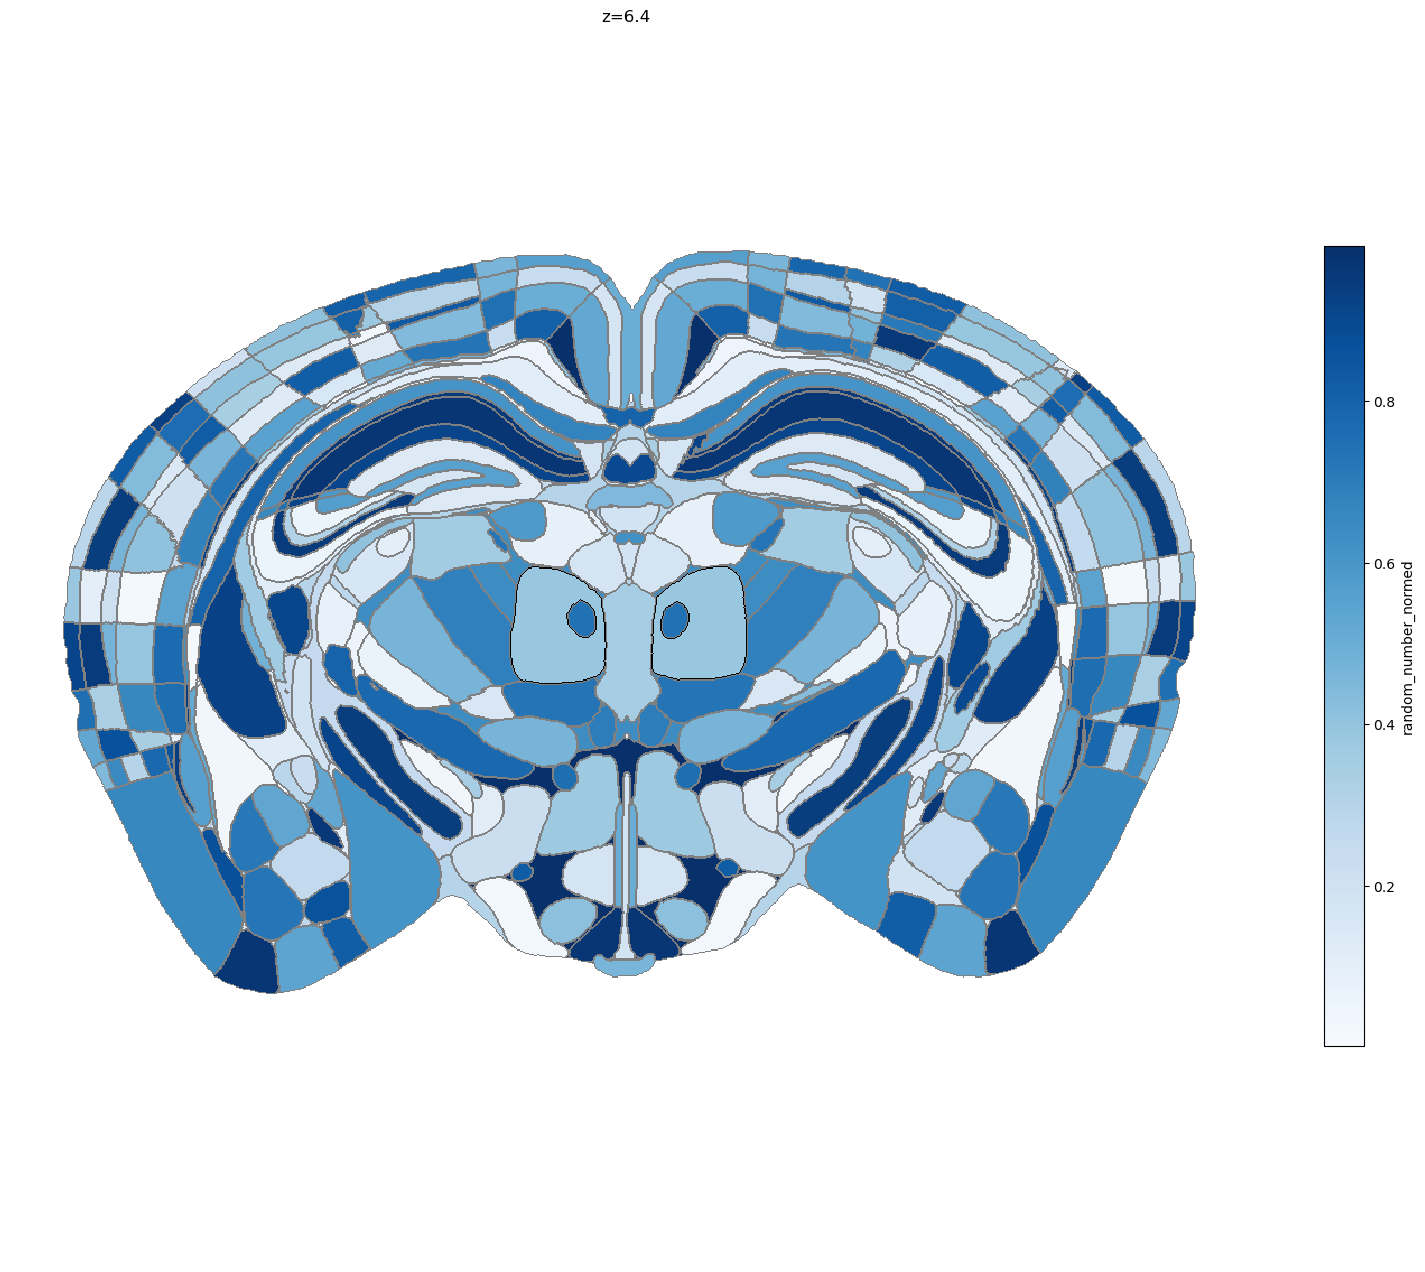

In [11]:
metrics_figs = cplots.plot_metrics_ccf_full_coronal(ccf_labels_img,
                                                    test_metric_df['test_metric'], # pd.Series with both index & values, e.g. column of a pd.DataFrame
                                                    sections_test,
                                                    ccf_level=ccf_level,
                                                    ccf_names=ccf_substructure_names,
                                                    ccf_highlight=['PF'], # needs to be a list, even for just one
                                                    cmap='Blues', cbar_label='random_number_normed')